<a href="https://colab.research.google.com/github/cvillarr123/marketingKPI/blob/main/Diabetes_ML_21_Agosto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Machine-Learning[1].png](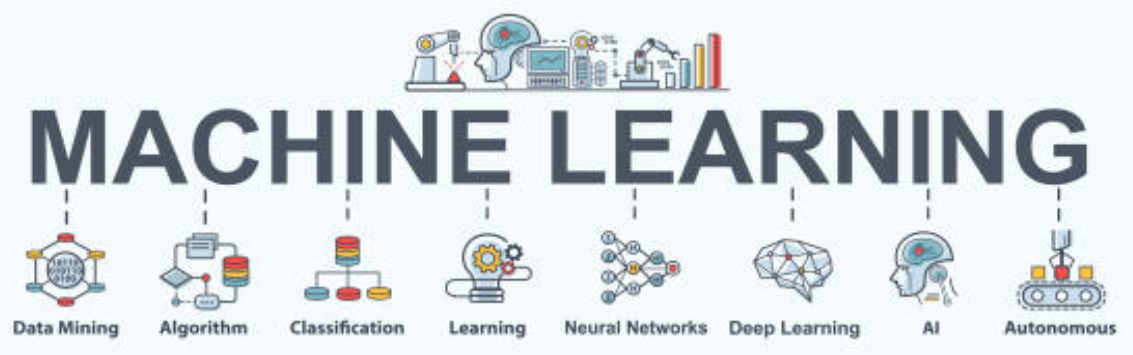)

# **¿ Qué es Machine Learning ?**

Los modelos de aprendizaje automático son algoritmos informáticos que utilizan datos para realizar estimaciones (conjeturas) o tomar decisiones

# **Diferencia entre AI - ML - DL**

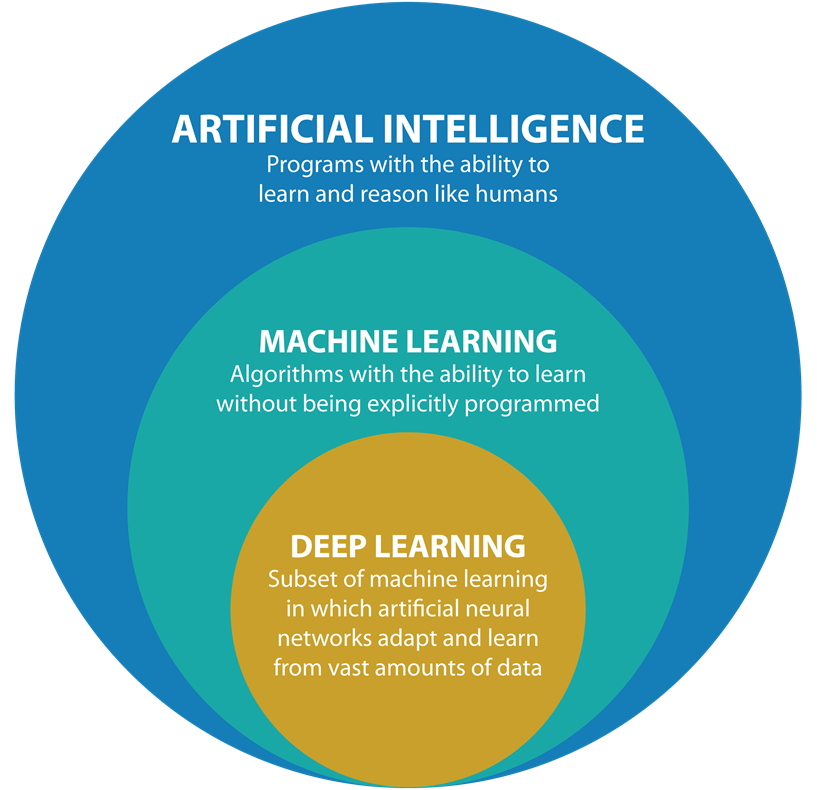

# **Diferencia con la programación tradicional**


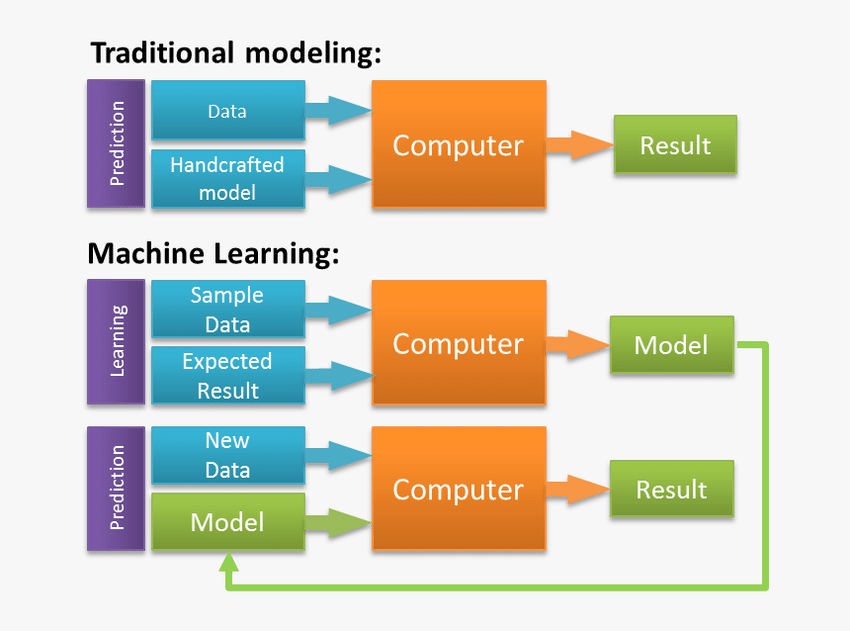

# **Los 3 tipos de aprendizaje de máquina**

1. **Aprendizaje supervisado**
En el aprendizaje supervisado, la máquina aprende con el ejemplo. De este modo, se proporciona al algoritmo de aprendizaje automático un conjunto de datos que incluye las entradas y salidas deseadas, y el algoritmo debe encontrar las reglas para determinar cómo llegar a esas entradas y salidas.

El algoritmo realiza predicciones y podemos ajustar los hiperparámetros, y este proceso sigue hasta que el algoritmo alcanza un alto nivel de precisión y rendimiento.

2. **Aprendizaje no supervisado**
Aquí, el algoritmo de aprendizaje automático estudia los datos para identificar patrones, sin haber tenido respuestas previas a los datos. En cambio, la máquina determina las correlaciones y las relaciones mediante el análisis de los datos disponibles.

En un proceso de aprendizaje no supervisado, se deja que el algoritmo de aprendizaje automático interprete grandes conjuntos de datos y dirija esos datos en consecuencia. Así, el algoritmo intenta organizar esos datos de alguna manera para describir su estructura. Esto podría significar la necesidad de agrupar los datos en grupos u organizarlos de manera que se vean más organizados.

A medida que evalúa más datos, su capacidad para tomar decisiones sobre los mismos mejora gradualmente y se vuelve más refinada.

3. **Aprendizaje por refuerzo**
El aprendizaje por refuerzo se centra en los procesos de aprendizajes reglamentados, en los que se proporcionan algoritmos de aprendizaje automáticos con un conjunto de acciones, parámetros y valores finales.

Al definir las reglas, el algoritmo de aprendizaje automático intenta explorar diferentes opciones y posibilidades, monitorizando y evaluando cada resultado para determinar cuál es el óptimo.

En consecuencia, este sistema enseña la máquina a través del proceso de ensayo y error. Aprende de experiencias pasadas y comienza a adaptar su enfoque en respuesta a la situación para lograr el mejor resultado posible.

https://www.apd.es/algoritmos-del-machine-learning/

# **¿ Qué algortimos vamos a trabajar en clase ?**

***Clasificación***

La clasificación es una subcategoría del aprendizaje supervisado en la que el objetivo es predecir las etiquetas de clase categóricas (discreta, valores no ordenados, pertenencia a grupo) de las nuevas instancias, basándonos en observaciones pasadas.

Hay dos tipos principales de clasificaciones:

**• Clasificación Binaria:** Es un tipo de clasificación en el que tan solo se pueden asignar dos clases diferentes (0 o 1). El ejemplo típico es la detección de email spam, en la que cada email es: spam → en cuyo caso será etiquetado con un 1 ; o no lo es → etiquetado con un 0.

**• Clasificación Multi-clase:** Se pueden asignar múltiples categorías a las observaciones. Como el reconocimiento de caracteres de escritura manual de números (en el que las clases van de 0 a 9).

**¿ Que otros ejemplos se les ocurren de clasificación ?**

*Fuente: https://medium.com/datos-y-ciencia/aprendizaje-supervisado-introducci%C3%B3n-a-la-clasificaci%C3%B3n-y-principales-algoritmos-dadee99c9407*



***Recomendación***

A modo de introducción, la primera pregunta que nos hacemos es: ***¿qué son los modelos de recomendación?*** 

Estos modelos son herramientas que generan recomendaciones sobre un determinado objeto de estudio, a partir de las preferencias y opiniones dadas por los distintos usuarios.

La segunda pregunta empieza a parecerse a: ***¿para qué recomendar?***,

*   Ahorro de tiempo
*   Personalizando su experiencia
*   Mayor conocimientos de mis clientes
*   Aumentar el engagement
*   Crosselling | Upselling
*   Ayudar a los usuarios a encontrar su mejor elección

**¿Qué modelos de recomendación existen?** 

En la actualidad, existen tres grandes ramas:

– Collaborative Filtering

– Contet Based Filtering

– Hybrid Model

Fuente: https://quanam.com/modelos-de-recomendacion-recomendando-que-recomendar/


# Preparación de los datos y el módelo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# set seed for reproducibility
SEED = 20
np.random.seed(SEED)

In [ ]:
# Loading Data
df = pd.read_csv('diabetes.csv')

# Análisis Exploratorio de Datos

In [ ]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,15000.0,1.502922e+06,289253.443471,1.000038e+06,1.252866e+06,1.505508e+06,1.755205e+06,1.999997e+06
Pregnancies,15000.0,3.224533e+00,3.391020,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
PlasmaGlucose,15000.0,1.078569e+02,31.981975,4.400000e+01,8.400000e+01,1.040000e+02,1.290000e+02,1.920000e+02
DiastolicBloodPressure,15000.0,7.122067e+01,16.758716,2.400000e+01,5.800000e+01,7.200000e+01,8.500000e+01,1.170000e+02
TricepsThickness,15000.0,2.881400e+01,14.555716,7.000000e+00,1.500000e+01,3.100000e+01,4.100000e+01,9.300000e+01
SerumInsulin,15000.0,1.378521e+02,133.068252,1.400000e+01,3.900000e+01,8.300000e+01,1.950000e+02,7.990000e+02
BMI,15000.0,3.150965e+01,9.759000,1.820051e+01,2.125989e+01,3.176794e+01,3.925969e+01,5.603463e+01
DiabetesPedigree,15000.0,3.989677e-01,0.377944,7.804379e-02,1.377433e-01,2.002971e-01,6.162851e-01,2.301594e+00
Age,15000.0,3.013773e+01,12.089703,2.100000e+01,2.200000e+01,2.400000e+01,3.500000e+01,7.700000e+01
Diabetic,15000.0,3.333333e-01,0.471420,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


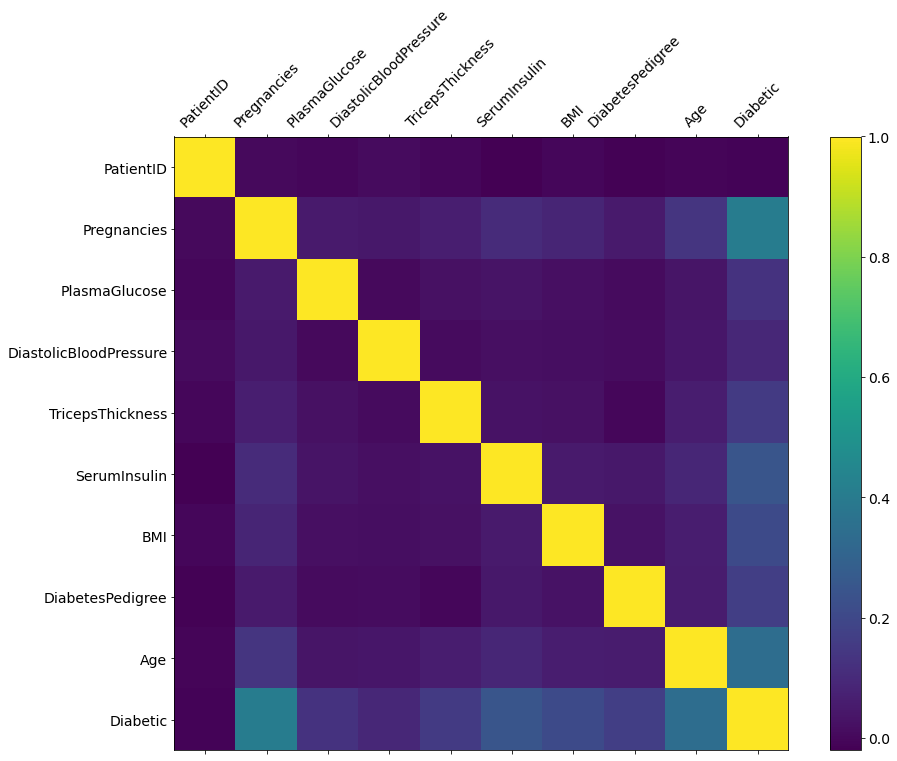

In [ ]:
f = plt.figure(figsize=(15, 11))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
fig = px.histogram(df, x="Pregnancies", color="Diabetic",marginal="box")
fig2 = px.histogram(df, x="PlasmaGlucose", color="Diabetic",marginal="box")
fig3 = px.histogram(df, x="BMI", color="Diabetic",marginal="box")
fig.show()
fig2.show()
fig3.show()

# **Ingeniería de variables**

**Imputación de valores ( null | na | 0 )** 

In [ ]:
#Reemplazamos los valores de 0 por NULL en las columnas numéricas

def replace_zero(df):
    df.drop("PatientID",axis=1,inplace=True) #elimino columnas que no se van a usar en el modelo
    df_nan=df.copy(deep=True)
    cols = ["PlasmaGlucose","DiastolicBloodPressure","TricepsThickness","SerumInsulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan


In [ ]:
df_nan=replace_zero(df)

In [ ]:
#Encuentro el valor de la mediana de las columnas numéricas por grupo de respuesta ( tiene o no tiene diabetes )

def find_median(frame,var):
    temp = frame[frame[var].notnull()]
    temp = frame[[var,'Diabetic']].groupby('Diabetic')[[var]].median().reset_index()
    return temp

In [ ]:
#Qué hace la función
df[["PlasmaGlucose",'Diabetic']].groupby('Diabetic')[["PlasmaGlucose"]].median().reset_index() #Diferencia de mean() | median()

,Diabetic,PlasmaGlucose
0,0,96
1,1,108


Existen algunas estrategias para imputación de valores, todo depende del caso de uso, reemplazar con la media, la mediana, la moda.

Existen librerías en sklearn que pueden profundizar para hacer imputaciones más complejas

Referencias:


*   https://www.medwave.cl/link.cgi/Medwave/Series/MBE04/4934
*   https://scikit-learn.org/stable/modules/impute.html



In [ ]:
def replace_null(frame,var):
    median_df=find_median(frame,var)
    var_0=median_df[var].iloc[0]
    var_1=median_df[var].iloc[1]
    frame.loc[(frame['Diabetic'] == 0) & (frame[var].isnull()), var] = var_0
    frame.loc[(frame['Diabetic'] == 1) & (frame[var].isnull()), var] = var_1
    return frame[var].isnull().sum()

In [ ]:
print(str(replace_null(df_nan,'PlasmaGlucose'))+ ' Nulls for Glucose')
print(str(replace_null(df_nan,'TricepsThickness'))+ ' Nulls for SkinThickness')
print(str(replace_null(df_nan,'SerumInsulin'))+ ' Nulls for Insulin')
print(str(replace_null(df_nan,'BMI'))+ ' Nulls for BMI')
print(str(replace_null(df_nan,'DiastolicBloodPressure'))+ ' Nulls for BloodPressure')
# We have successfully handled Nulls

0 Nulls for Glucose
0 Nulls for SkinThickness
0 Nulls for Insulin
0 Nulls for BMI
0 Nulls for BloodPressure


In [ ]:
df_nan.isnull().sum()
# Just a confirmation
# Everything looks good

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [ ]:
X = df_nan.drop("Diabetic",axis=1) #Elimina la columna target "Diabetic"
Y = df_nan["Diabetic"]

In [ ]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Diabetic, dtype: int64

# **Scikit-learn**

Scikit-learn es una biblioteca para aprendizaje automático de software libre para Python.

​Incluye varios algoritmos de clasificación, regresión y clusters, entre los cuales están SVM, Random Forest, Gradient boosting, K-means y otros. 

Está diseñada para interoperar con las bibliotecas numéricas y científicas NumPy y SciPy.

https://scikit-learn.org/stable/

https://qu4nt.github.io/sklearn-doc-es/index.html

**Train | Test**

Entre las herramientas de **Scikit-learn** nos podemos encontrar con la función train_test_split. 

Una función que nos permite dividir un conjunto de datos en uno de entrenamiento y otro de test. 

https://www.analyticslane.com/2020/04/20/entrenamiento-validacion-y-test-con-scikit-learn/

https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test#sklearn.model_selection.train_test_split



In [ ]:
#Keeping train  size as 0.8
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20, stratify=Y)

#stratify obtiene la misma proporción en los registros aleatorios de 0 y 1

# Por ejemplo, si la variable y es una variable categórica binaria con valores 0 y 1 y hay un 25% de ceros y un
# 75% de unos, stratify=y se asegurará de que su división aleatoria tenga un 25% de 0 y un 75% de 1."""


In [ ]:
df["Diabetic"].value_counts()

# 34% de 1
# 66% de 0

0    10000
1     5000
Name: Diabetic, dtype: int64

# **Probamos varios modelos**

**KNN**

En la clasificación K-NN, el resultado es una marca de clase. 

Un objeto se clasifica por el voto mayoritario de sus vecinos, asignándose el objeto a la clase más común en sus k vecinos más cercanos (k  es un numero entero positivo, típicamente pequeño). 

Si k=1, entonces el objeto se asigna simplemente a la clase de ese vecino más cercano.

• https://pythondiario.com/2018/01/introduccion-al-machine-learning-9-k.html

• https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

• https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier

In [ ]:
# We are good to go with baseline model
# Let's first implement KNN
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(5,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_scores.append(neigh.score(X_train,Y_train))
    test_scores.append(neigh.score(X_test,Y_test))

#score -> Devuelve la precisión(accuracy) media en los datos de entrenamiento y prueba.

In [ ]:
print('Max train_scores is ' + str(max(train_scores)*100) + ' for k = '+ 
      str(train_scores.index(max(train_scores))+5))

#ejercicio redondear a 2 decimales

Max train_scores is 88.84166666666667 for k = 5


In [ ]:
print('Max test_scores is ' + str(max(test_scores)*100) + ' for k = '+ 
      str(test_scores.index(max(test_scores))+5))
# K=13 has generalized well for our data.

#almaceno el valor del score para compararlo más delante
knn = max(test_scores)*100

#ejercicio redondear a 2 decimales

Max test_scores is 84.93333333333334 for k = 13


**Regresión Logística**

• La regresión logística, a pesar de su nombre, es un modelo lineal de clasificación más que de regresión. 

• La regresión logística también se conoce como regresión logit.

• En este modelo, las probabilidades que describen los posibles resultados de un único ensayo se modelan mediante una función logística.

https://www.iartificial.net/como-usar-regresion-logistica-en-python/

https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

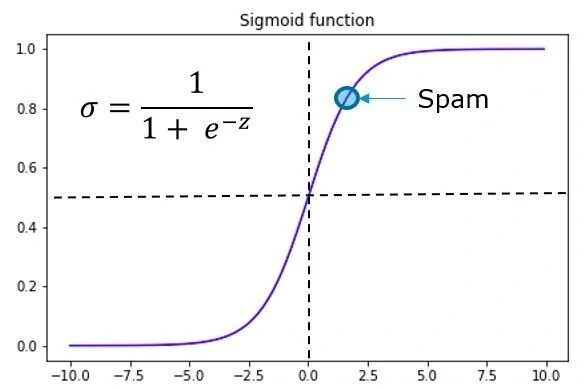

In [ ]:
# Lets try Logistic regression now
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=20,max_iter=5000).fit(X_train, Y_train)
log_pred=log_model.predict(X_test)
lr = log_model.score(X_test, Y_test) * 100

In [ ]:
lr

79.26666666666667

**Support vector machines, SVMs**

Es un métodos de aprendizaje supervisado que se utiliza para clasificació, regresión y la detección de valores atípicos.

Las ventajas de SVM son:

• Efectivas en espacios de alta dimensión.

• Aún efectivas en los casos en que el número de dimensiones es mayor que el número de muestras.

• Utilizan un subconjunto de puntos de entrenamiento en la función de decisión (llamados vectores de soporte), por lo que también son eficientes en cuanto a memoria.

•**Versátiles:** se pueden especificar diferentes Funciones del núcleo para la función de decisión. Se proporcionan kernels comunes, pero también es posible especificar núcleos personalizados.

https://estadisticamente.com/que-es-un-modelo-svm/

https://qu4nt.github.io/sklearn-doc-es/modules/svm.html

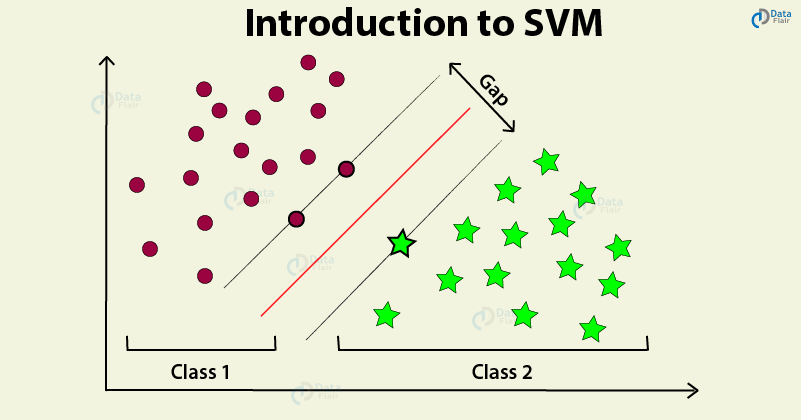

In [ ]:
# Support Vector Machines
from sklearn import svm
svm_model = svm.SVC().fit(X_train, Y_train)
svm_pred=svm_model.predict(X_test)
svm_model.score(X_test, Y_test)

svm = svm_model.score(X_test, Y_test) * 100

In [ ]:
svm

82.26666666666667

**Random Forest**

• Random Forest es un algoritmo de aprendizaje supervisado. 

• Puede utilizarse tanto para la clasificación como para la regresión. 

• Es uno de lo algoritmos más flexible y fácil de usar. 

• Un bosque está compuesto de árboles. Se dice que cuantos más árboles tenga, más robusto será el bosque. 

• Los modelos random forest crean árboles de decisión a partir de muestras de datos seleccionados al azar, obtiene predicciones de cada árbol y selecciona la mejor solución mediante votación. También proporciona un indicador bastante bueno de la importancia de la característica.

• Técnicamente es un método de conjunto, basado en el enfoque de dividir y conquistar de árboles de decisión generados en un conjunto de datos dividido al azar. 

• Los árboles de decisión individuales se generan utilizando un indicador de selección de atributos, como la ganancia de información, la relación de ganancia y el índice Gini, para cada atributo. 

• Cada árbol depende de una muestra aleatoria independiente. 

•En un problema de clasificación, cada árbol vota y se elige la clase más popular como resultado final. 

• Es más simple y más potente en comparación con otros algoritmos de clasificación no lineal.

https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://aprendeia.com/bosques-aleatorios-clasificacion-teoria-machine-learning/

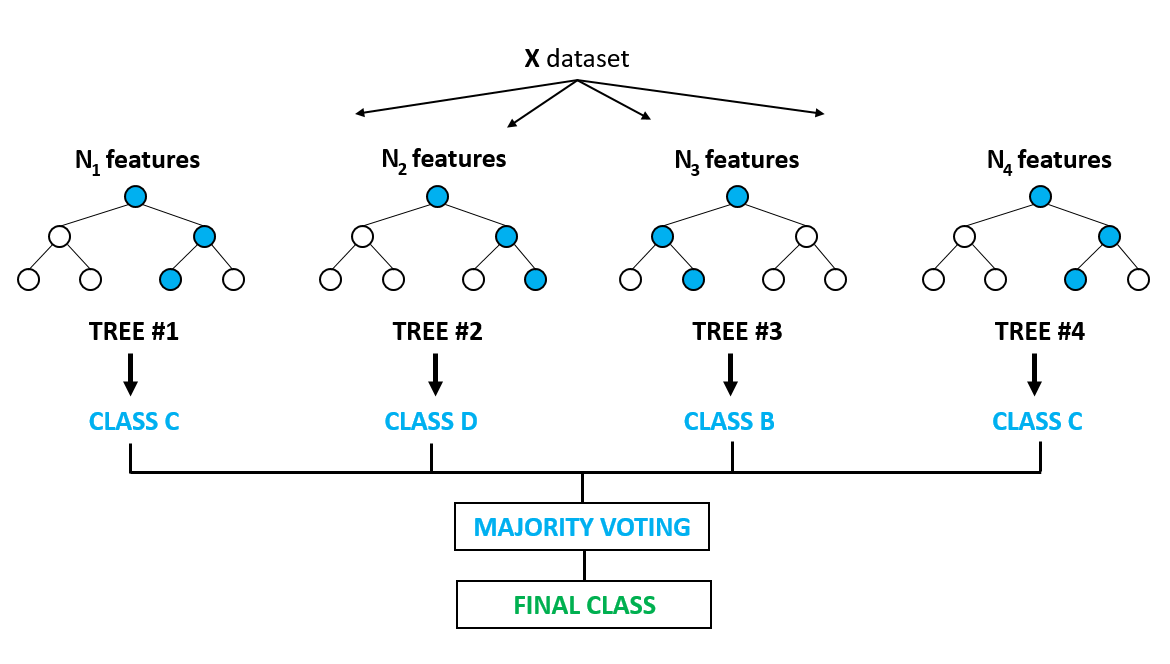

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=20).fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
rf_model.score(X_test, Y_test)

rf = rf_model.score(X_test, Y_test) * 100

In [ ]:
rf

90.0

**Clasificación usando Tensorflow**

• Una red neuronal es un modelo matemático inspirado en el funcionamiento del cerebro humano. 



https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

https://towardsdatascience.com/build-the-artificial-intelligence-for-detecting-diabetes-using-neural-networks-and-keras-89962097f0b0

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/arquitectura-de-redes-neuronales


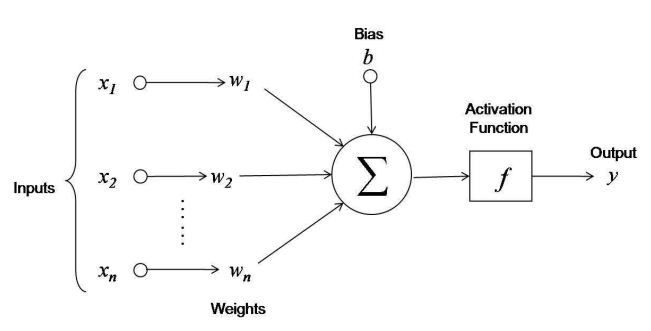

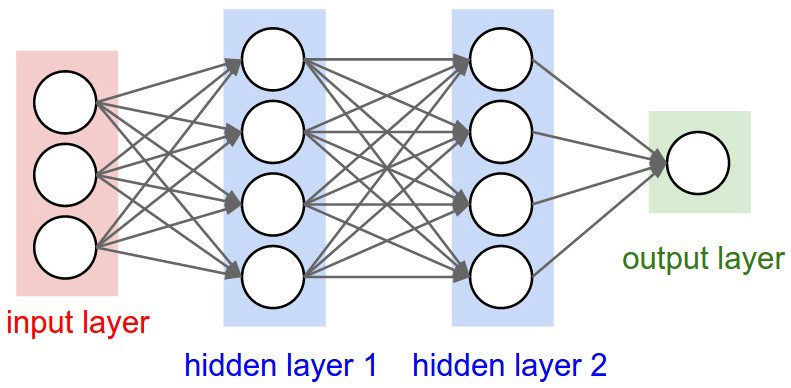

In [ ]:
import tensorflow as tf

def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(X_train.columns)]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

neural_model = build_model()

In [ ]:
neural_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 3         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Keeping EPOCHs high as dataset is small.
EPOCHS = 100
neural_pred = neural_model.fit(X_train, Y_train,epochs=EPOCHS, validation_split=0.1, verbose=2)

Epoch 1/100
338/338 - 1s - loss: 0.6443 - accuracy: 0.6657 - val_loss: 0.6320 - val_accuracy: 0.6733
Epoch 2/100
338/338 - 0s - loss: 0.6371 - accuracy: 0.6659 - val_loss: 0.6335 - val_accuracy: 0.6733
Epoch 3/100
338/338 - 0s - loss: 0.6374 - accuracy: 0.6659 - val_loss: 0.6319 - val_accuracy: 0.6733
Epoch 4/100
338/338 - 0s - loss: 0.6371 - accuracy: 0.6659 - val_loss: 0.6318 - val_accuracy: 0.6733
Epoch 5/100
338/338 - 0s - loss: 0.6373 - accuracy: 0.6659 - val_loss: 0.6318 - val_accuracy: 0.6733
Epoch 6/100
338/338 - 0s - loss: 0.6371 - accuracy: 0.6659 - val_loss: 0.6328 - val_accuracy: 0.6733
Epoch 7/100
338/338 - 0s - loss: 0.6373 - accuracy: 0.6659 - val_loss: 0.6321 - val_accuracy: 0.6733
Epoch 8/100
338/338 - 0s - loss: 0.6370 - accuracy: 0.6659 - val_loss: 0.6318 - val_accuracy: 0.6733
Epoch 9/100
338/338 - 0s - loss: 0.6372 - accuracy: 0.6659 - val_loss: 0.6324 - val_accuracy: 0.6733
Epoch 10/100
338/338 - 0s - loss: 0.6372 - accuracy: 0.6659 - val_loss: 0.6318 - val_accura

In [ ]:
_, acc = neural_model.evaluate(X_test, Y_test,
                            batch_size=64)
print('Test accuracy:', acc)

acc = acc *100

47/47 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.6667
Test accuracy: 0.6666666865348816


# ¿ Cual es el mejor modelo ?

In [ ]:
data = {'Modelo': ['KNN', 'Regresión Logística', 'Random Forest', 'SVM', 'Keras'],
    'acc': [knn, lr, rf, svm, acc]}

df_models = pd.DataFrame(data)

In [ ]:
df_models.sort_values("acc",ascending=False,)

,Modelo,acc
2,Random Forest,90.000000
0,KNN,84.933333
3,SVM,82.266667
1,Regresión Logística,79.266667
4,Keras,66.666669


# Serializando el mejor modelo

El modulo pickle implementa protocolos binarios para serializar y deserializar una estructura de objetos Python. «Pickling» es el proceso mediante el cual una jerarquía de objetos de Python se convierte en una secuencia de bytes, y el «unpickling» es la operación inversa, mediante la cual una secuencia de bytes de un archivo binario (binary file) ó un objeto tipo binario (bytes-like object) es convertido nuevamente en una jerarquía de objetos. Pickling (y unpickling) son alternativamente conocidos como «serialización», «ensamblaje,»

In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(rf_model, open('rf_model.pkl','wb'))

In [ ]:
(X_test[2:3])

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
13724,0,93,80,33,40,20.875334,0.1067,21


In [ ]:
pred = rf_model.predict_proba( X_test[2:3] )

In [ ]:
pred

array([[0.9483709, 0.0516291]])

In [ ]:
np.argmax(pred)

0

# **¿ Qué sigue ?**



*   Ajuste de Hiperparámetros
*   Escalar valores numéricos
*   Probar nuevos modelos
*   Participar en Hackatones: *Kaggle, DPHI*
*   Seguir estudiando



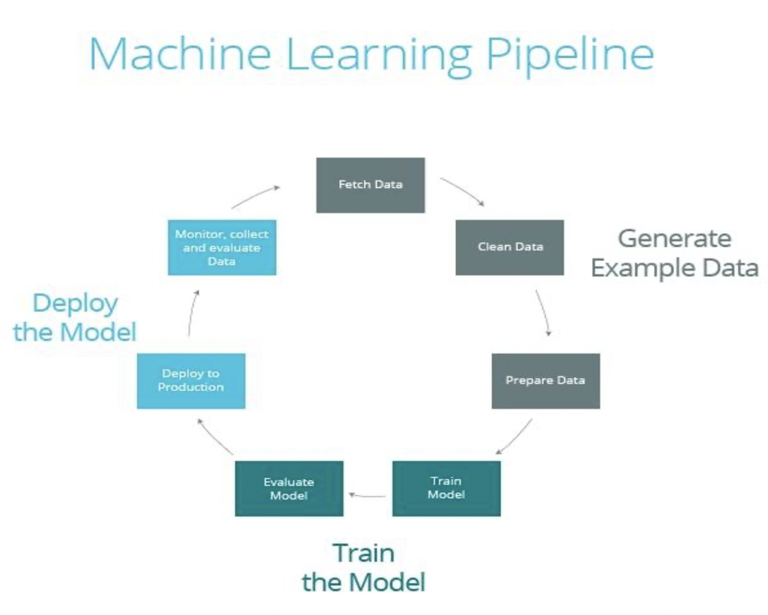